In [1]:
import numpy as np
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import geone
import geone.covModel as gcm
import geone.imgplot3d as imgplt3
import pyvista as pv
import sys
import os
import flopy as fp
import pyemu
import pandas as pd

sys.path.append("../../../")
#my modules
from ArchPy.base import *
from ArchPy.tpgs import *

In [2]:
tmp_model_ws = "reference"
sim = fp.mf6.MFSimulation.load(sim_ws=tmp_model_ws)
m = sim.get_model("test")

loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package oc...
    loading package ic...
    loading package npf...
    loading package chd...
    loading package obs...
  loading solution package test...


In [3]:
# sr = pyemu.helpers.SpatialReference(delr=m.dis.delr.array, delc=m.dis.delc.array,
#                                     xul=0, yul=0)

In [4]:
sr = pyemu.helpers.SpatialReference.from_namfile(
        os.path.join(tmp_model_ws, "test.nam"),
        delr=m.dis.delr.array, delc=m.dis.delc.array)
sr
template_ws = "template"
pf = pyemu.utils.PstFrom(original_d=tmp_model_ws, new_d=template_ws,
                 remove_existing=True,
                 longnames=True, spatial_reference=sr,
                 zero_based=False,start_datetime="1-1-2025")

   could not remove start_datetime
2025-09-08 09:32:49.624306 starting: opening PstFrom.log for logging
2025-09-08 09:32:49.624306 starting PstFrom process
2025-09-08 09:32:49.625307 starting: setting up dirs
2025-09-08 09:32:49.625307 starting: removing existing new_d 'template'
2025-09-08 09:32:49.645325 finished: removing existing new_d 'template' took: 0:00:00.020018
2025-09-08 09:32:49.645325 starting: copying original_d 'reference' to new_d 'template'
2025-09-08 09:32:49.684362 finished: copying original_d 'reference' to new_d 'template' took: 0:00:00.039037
2025-09-08 09:32:49.685362 finished: setting up dirs took: 0:00:00.060055


In [5]:
tmp_model_ws

'reference'

## Observations

In [6]:
df = pd.read_csv(os.path.join(tmp_model_ws,"head_obs_ref.csv"),index_col=0)
df

,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10
time,,,,,,,,,,
1.0,0.82917,0.63444,0.51598,0.16747,0.041251,0.043433,0.22857,0.10737,0.85958,0.32017


In [7]:
# open(os.path.join(tmp_model_ws,"head_obs_ref.csv"))

In [8]:
hds_df = pf.add_observations("head_obs_ref.csv",insfile="head_obs_ref.csv.ins", index_cols="time",
                    use_cols=list(df.columns.values),prefix="hds",)
hds_df

2025-09-08 09:32:49.727081 starting: adding observations from output file head_obs_ref.csv
2025-09-08 09:32:49.727081 starting: adding observations from tabular output file '['head_obs_ref.csv']'
2025-09-08 09:32:49.727081 starting: reading list-style file: template\head_obs_ref.csv
2025-09-08 09:32:49.739093 finished: reading list-style file: template\head_obs_ref.csv took: 0:00:00.012012
2025-09-08 09:32:49.741094 starting: building insfile for tabular output file head_obs_ref.csv
2025-09-08 09:32:49.744096 finished: building insfile for tabular output file head_obs_ref.csv took: 0:00:00.003002
2025-09-08 09:32:49.744096 starting: adding observation from instruction file 'template\head_obs_ref.csv.ins'
2025-09-08 09:32:49.756108 finished: adding observation from instruction file 'template\head_obs_ref.csv.ins' took: 0:00:00.012012
2025-09-08 09:32:49.757109 finished: adding observations from tabular output file '['head_obs_ref.csv']' took: 0:00:00.030028
2025-09-08 09:32:49.757109 fi

,obsnme,obsval,weight,obgnme
oname:hds_otype:lst_usecol:h10_time:1,oname:hds_otype:lst_usecol:h10_time:1,0.320170,1.0,oname:hds_otype:lst_usecol:h10
oname:hds_otype:lst_usecol:h1_time:1,oname:hds_otype:lst_usecol:h1_time:1,0.829170,1.0,oname:hds_otype:lst_usecol:h1
oname:hds_otype:lst_usecol:h2_time:1,oname:hds_otype:lst_usecol:h2_time:1,0.634440,1.0,oname:hds_otype:lst_usecol:h2
oname:hds_otype:lst_usecol:h3_time:1,oname:hds_otype:lst_usecol:h3_time:1,0.515980,1.0,oname:hds_otype:lst_usecol:h3
oname:hds_otype:lst_usecol:h4_time:1,oname:hds_otype:lst_usecol:h4_time:1,0.167470,1.0,oname:hds_otype:lst_usecol:h4
oname:hds_otype:lst_usecol:h5_time:1,oname:hds_otype:lst_usecol:h5_time:1,0.041251,1.0,oname:hds_otype:lst_usecol:h5
oname:hds_otype:lst_usecol:h6_time:1,oname:hds_otype:lst_usecol:h6_time:1,0.043433,1.0,oname:hds_otype:lst_usecol:h6
oname:hds_otype:lst_usecol:h7_time:1,oname:hds_otype:lst_usecol:h7_time:1,0.228570,1.0,oname:hds_otype:lst_usecol:h7
oname:hds_otype:lst_usecol:h8_time:1,oname:hds_otype:lst_usecol:h8_time:1,0.107370,1.0,oname:hds_otype:lst_usecol:h8
oname:hds_otype:lst_usecol:h9_time:1,oname:hds_otype:lst_usecol:h9_time:1,0.859580,1.0,oname:hds_otype:lst_usecol:h9


In [9]:
error_h = 0.01  # 2 sigma
pf.obs_dfs[0].weight = 1 / (error_h/2)

In [10]:
pf.obs_dfs[0]

,obsnme,obsval,weight,obgnme
oname:hds_otype:lst_usecol:h10_time:1,oname:hds_otype:lst_usecol:h10_time:1,0.320170,200.0,oname:hds_otype:lst_usecol:h10
oname:hds_otype:lst_usecol:h1_time:1,oname:hds_otype:lst_usecol:h1_time:1,0.829170,200.0,oname:hds_otype:lst_usecol:h1
oname:hds_otype:lst_usecol:h2_time:1,oname:hds_otype:lst_usecol:h2_time:1,0.634440,200.0,oname:hds_otype:lst_usecol:h2
oname:hds_otype:lst_usecol:h3_time:1,oname:hds_otype:lst_usecol:h3_time:1,0.515980,200.0,oname:hds_otype:lst_usecol:h3
oname:hds_otype:lst_usecol:h4_time:1,oname:hds_otype:lst_usecol:h4_time:1,0.167470,200.0,oname:hds_otype:lst_usecol:h4
oname:hds_otype:lst_usecol:h5_time:1,oname:hds_otype:lst_usecol:h5_time:1,0.041251,200.0,oname:hds_otype:lst_usecol:h5
oname:hds_otype:lst_usecol:h6_time:1,oname:hds_otype:lst_usecol:h6_time:1,0.043433,200.0,oname:hds_otype:lst_usecol:h6
oname:hds_otype:lst_usecol:h7_time:1,oname:hds_otype:lst_usecol:h7_time:1,0.228570,200.0,oname:hds_otype:lst_usecol:h7
oname:hds_otype:lst_usecol:h8_time:1,oname:hds_otype:lst_usecol:h8_time:1,0.107370,200.0,oname:hds_otype:lst_usecol:h8
oname:hds_otype:lst_usecol:h9_time:1,oname:hds_otype:lst_usecol:h9_time:1,0.859580,200.0,oname:hds_otype:lst_usecol:h9


In [11]:
[f for f in os.listdir(template_ws) if f.endswith(".ins")]

['head_obs_ref.csv.ins']

## Parameters

### C
parameters are the surface elevation of unit C, stored as a txt file

In [12]:
arr_file = "mean_C.txt"
tag = arr_file.split('.')[0]
pf.add_parameters(filenames=arr_file, par_type="grid",
                   par_name_base=tag, pargp=tag, zone_array=None,
                   par_style="multiplier",
                   upper_bound=10., lower_bound=0.1,
                   ult_ubound=10, ult_lbound=0.1)

2025-09-08 09:32:49.809623 transform was not passed, setting default tranform to 'log'
2025-09-08 09:32:49.810624 starting: adding grid type m style parameters for file(s) ['mean_C.txt']
2025-09-08 09:32:49.810624 starting: loading array template\mean_C.txt
2025-09-08 09:32:49.826639 finished: loading array template\mean_C.txt took: 0:00:00.016015
2025-09-08 09:32:49.826639 loaded array 'reference\mean_C.txt' of shape (70, 140)
2025-09-08 09:32:49.835646 starting: writing array-style template file 'template\mean_c_inst0_grid.csv.tpl'
2025-09-08 09:32:49.835646 starting: writing template file template\mean_c_inst0_grid.csv.tpl for ['mean_c_inst:0']
2025-09-08 09:32:49.939742 finished: writing template file template\mean_c_inst0_grid.csv.tpl for ['mean_c_inst:0'] took: 0:00:00.104096
2025-09-08 09:32:49.940742 starting: writing array-based template file 'template\mean_c_inst0_grid.csv.tpl'
2025-09-08 09:32:49.953754 finished: adding grid type m style parameters for file(s) ['mean_C.txt']

,parnme,parval1,i,j,x,y,pargp,tpl_filename,input_filename,partype,partrans,parubnd,parlbnd,parchglim,scale,offset,dercom
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:0_x:0.75_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:0_x:0.75_y:104.25,1.0,0,0,0.75,104.25,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:1_x:2.25_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:1_x:2.25_y:104.25,1.0,0,1,2.25,104.25,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:2_x:3.75_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:2_x:3.75_y:104.25,1.0,0,2,3.75,104.25,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:3_x:5.25_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:3_x:5.25_y:104.25,1.0,0,3,5.25,104.25,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:4_x:6.75_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:4_x:6.75_y:104.25,1.0,0,4,6.75,104.25,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:69_j:135_x:203.25_y:0.75,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:69_j:135_x:203.25_y:0.75,1.0,69,135,203.25,0.75,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:69_j:136_x:204.75_y:0.75,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:69_j:136_x:204.75_y:0.75,1.0,69,136,204.75,0.75,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:69_j:137_x:206.25_y:0.75,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:69_j:137_x:206.25_y:0.75,1.0,69,137,206.25,0.75,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:69_j:138_x:207.75_y:0.75,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:69_j:138_x:207.75_y:0.75,1.0,69,138,207.75,0.75,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1


### D1

In [13]:
arr_file = "mean_D1.txt"
tag = arr_file.split('.')[0]
pf.add_parameters(filenames=arr_file, par_type="grid",
                   par_name_base=tag, pargp=tag, zone_array=None,
                   par_style="multiplier",
                   upper_bound=10., lower_bound=0.1,
                   ult_ubound=10, ult_lbound=0.1)

2025-09-08 09:32:49.974783 transform was not passed, setting default tranform to 'log'
2025-09-08 09:32:49.974783 starting: adding grid type m style parameters for file(s) ['mean_D1.txt']
2025-09-08 09:32:49.975783 starting: loading array template\mean_D1.txt
2025-09-08 09:32:49.993800 finished: loading array template\mean_D1.txt took: 0:00:00.018017
2025-09-08 09:32:49.993800 loaded array 'reference\mean_D1.txt' of shape (70, 140)
2025-09-08 09:32:50.002808 starting: writing array-style template file 'template\mean_d1_inst0_grid.csv.tpl'
2025-09-08 09:32:50.002808 starting: writing template file template\mean_d1_inst0_grid.csv.tpl for ['mean_d1_inst:0']
2025-09-08 09:32:50.104901 finished: writing template file template\mean_d1_inst0_grid.csv.tpl for ['mean_d1_inst:0'] took: 0:00:00.102093
2025-09-08 09:32:50.104901 starting: writing array-based template file 'template\mean_d1_inst0_grid.csv.tpl'
2025-09-08 09:32:50.116912 finished: adding grid type m style parameters for file(s) ['me

,parnme,parval1,i,j,x,y,pargp,tpl_filename,input_filename,partype,partrans,parubnd,parlbnd,parchglim,scale,offset,dercom
pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:0_j:0_x:0.75_y:104.25,pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:0_j:0_x:0.75_y:104.25,1.0,0,0,0.75,104.25,mean_d1,template\mean_d1_inst0_grid.csv.tpl,template\mult\mean_d1_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:0_j:1_x:2.25_y:104.25,pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:0_j:1_x:2.25_y:104.25,1.0,0,1,2.25,104.25,mean_d1,template\mean_d1_inst0_grid.csv.tpl,template\mult\mean_d1_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:0_j:2_x:3.75_y:104.25,pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:0_j:2_x:3.75_y:104.25,1.0,0,2,3.75,104.25,mean_d1,template\mean_d1_inst0_grid.csv.tpl,template\mult\mean_d1_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:0_j:3_x:5.25_y:104.25,pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:0_j:3_x:5.25_y:104.25,1.0,0,3,5.25,104.25,mean_d1,template\mean_d1_inst0_grid.csv.tpl,template\mult\mean_d1_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:0_j:4_x:6.75_y:104.25,pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:0_j:4_x:6.75_y:104.25,1.0,0,4,6.75,104.25,mean_d1,template\mean_d1_inst0_grid.csv.tpl,template\mult\mean_d1_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:69_j:135_x:203.25_y:0.75,pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:69_j:135_x:203.25_y:0.75,1.0,69,135,203.25,0.75,mean_d1,template\mean_d1_inst0_grid.csv.tpl,template\mult\mean_d1_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:69_j:136_x:204.75_y:0.75,pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:69_j:136_x:204.75_y:0.75,1.0,69,136,204.75,0.75,mean_d1,template\mean_d1_inst0_grid.csv.tpl,template\mult\mean_d1_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:69_j:137_x:206.25_y:0.75,pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:69_j:137_x:206.25_y:0.75,1.0,69,137,206.25,0.75,mean_d1,template\mean_d1_inst0_grid.csv.tpl,template\mult\mean_d1_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:69_j:138_x:207.75_y:0.75,pname:mean_d1_inst:0_ptype:gr_pstyle:m_i:69_j:138_x:207.75_y:0.75,1.0,69,138,207.75,0.75,mean_d1,template\mean_d1_inst0_grid.csv.tpl,template\mult\mean_d1_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1


### B

In [14]:
arr_file = "mean_B.txt"
tag = arr_file.split('.')[0]
pf.add_parameters(filenames=arr_file, par_type="grid",
                   par_name_base=tag, pargp=tag, zone_array=None,
                   par_style="multiplier",
                   upper_bound=10., lower_bound=0.1,
                   ult_ubound=10, ult_lbound=0.1)

2025-09-08 09:32:50.138070 transform was not passed, setting default tranform to 'log'
2025-09-08 09:32:50.138070 starting: adding grid type m style parameters for file(s) ['mean_B.txt']
2025-09-08 09:32:50.138070 starting: loading array template\mean_B.txt
2025-09-08 09:32:50.154085 finished: loading array template\mean_B.txt took: 0:00:00.016015
2025-09-08 09:32:50.154085 loaded array 'reference\mean_B.txt' of shape (70, 140)
2025-09-08 09:32:50.163093 starting: writing array-style template file 'template\mean_b_inst0_grid.csv.tpl'
2025-09-08 09:32:50.163093 starting: writing template file template\mean_b_inst0_grid.csv.tpl for ['mean_b_inst:0']
2025-09-08 09:32:50.264184 finished: writing template file template\mean_b_inst0_grid.csv.tpl for ['mean_b_inst:0'] took: 0:00:00.101091
2025-09-08 09:32:50.265186 starting: writing array-based template file 'template\mean_b_inst0_grid.csv.tpl'
2025-09-08 09:32:50.279197 finished: adding grid type m style parameters for file(s) ['mean_B.txt']

,parnme,parval1,i,j,x,y,pargp,tpl_filename,input_filename,partype,partrans,parubnd,parlbnd,parchglim,scale,offset,dercom
pname:mean_b_inst:0_ptype:gr_pstyle:m_i:0_j:0_x:0.75_y:104.25,pname:mean_b_inst:0_ptype:gr_pstyle:m_i:0_j:0_x:0.75_y:104.25,1.0,0,0,0.75,104.25,mean_b,template\mean_b_inst0_grid.csv.tpl,template\mult\mean_b_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_b_inst:0_ptype:gr_pstyle:m_i:0_j:1_x:2.25_y:104.25,pname:mean_b_inst:0_ptype:gr_pstyle:m_i:0_j:1_x:2.25_y:104.25,1.0,0,1,2.25,104.25,mean_b,template\mean_b_inst0_grid.csv.tpl,template\mult\mean_b_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_b_inst:0_ptype:gr_pstyle:m_i:0_j:2_x:3.75_y:104.25,pname:mean_b_inst:0_ptype:gr_pstyle:m_i:0_j:2_x:3.75_y:104.25,1.0,0,2,3.75,104.25,mean_b,template\mean_b_inst0_grid.csv.tpl,template\mult\mean_b_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_b_inst:0_ptype:gr_pstyle:m_i:0_j:3_x:5.25_y:104.25,pname:mean_b_inst:0_ptype:gr_pstyle:m_i:0_j:3_x:5.25_y:104.25,1.0,0,3,5.25,104.25,mean_b,template\mean_b_inst0_grid.csv.tpl,template\mult\mean_b_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_b_inst:0_ptype:gr_pstyle:m_i:0_j:4_x:6.75_y:104.25,pname:mean_b_inst:0_ptype:gr_pstyle:m_i:0_j:4_x:6.75_y:104.25,1.0,0,4,6.75,104.25,mean_b,template\mean_b_inst0_grid.csv.tpl,template\mult\mean_b_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pname:mean_b_inst:0_ptype:gr_pstyle:m_i:69_j:135_x:203.25_y:0.75,pname:mean_b_inst:0_ptype:gr_pstyle:m_i:69_j:135_x:203.25_y:0.75,1.0,69,135,203.25,0.75,mean_b,template\mean_b_inst0_grid.csv.tpl,template\mult\mean_b_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_b_inst:0_ptype:gr_pstyle:m_i:69_j:136_x:204.75_y:0.75,pname:mean_b_inst:0_ptype:gr_pstyle:m_i:69_j:136_x:204.75_y:0.75,1.0,69,136,204.75,0.75,mean_b,template\mean_b_inst0_grid.csv.tpl,template\mult\mean_b_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_b_inst:0_ptype:gr_pstyle:m_i:69_j:137_x:206.25_y:0.75,pname:mean_b_inst:0_ptype:gr_pstyle:m_i:69_j:137_x:206.25_y:0.75,1.0,69,137,206.25,0.75,mean_b,template\mean_b_inst0_grid.csv.tpl,template\mult\mean_b_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_b_inst:0_ptype:gr_pstyle:m_i:69_j:138_x:207.75_y:0.75,pname:mean_b_inst:0_ptype:gr_pstyle:m_i:69_j:138_x:207.75_y:0.75,1.0,69,138,207.75,0.75,mean_b,template\mean_b_inst0_grid.csv.tpl,template\mult\mean_b_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1


### A

In [15]:
arr_file = "mean_A.txt"
tag = arr_file.split('.')[0]
pf.add_parameters(filenames=arr_file, par_type="grid",
                   par_name_base=tag, pargp=tag, zone_array=None,
                   par_style="multiplier",
                   upper_bound=10., lower_bound=0.1,
                   ult_ubound=10, ult_lbound=0.1)

2025-09-08 09:32:50.299834 transform was not passed, setting default tranform to 'log'
2025-09-08 09:32:50.299834 starting: adding grid type m style parameters for file(s) ['mean_A.txt']
2025-09-08 09:32:50.300834 starting: loading array template\mean_A.txt
2025-09-08 09:32:50.321854 finished: loading array template\mean_A.txt took: 0:00:00.021020
2025-09-08 09:32:50.321854 loaded array 'reference\mean_A.txt' of shape (70, 140)
2025-09-08 09:32:50.331863 starting: writing array-style template file 'template\mean_a_inst0_grid.csv.tpl'
2025-09-08 09:32:50.331863 starting: writing template file template\mean_a_inst0_grid.csv.tpl for ['mean_a_inst:0']
2025-09-08 09:32:50.432954 finished: writing template file template\mean_a_inst0_grid.csv.tpl for ['mean_a_inst:0'] took: 0:00:00.101091
2025-09-08 09:32:50.432954 starting: writing array-based template file 'template\mean_a_inst0_grid.csv.tpl'
2025-09-08 09:32:50.444965 finished: adding grid type m style parameters for file(s) ['mean_A.txt']

,parnme,parval1,i,j,x,y,pargp,tpl_filename,input_filename,partype,partrans,parubnd,parlbnd,parchglim,scale,offset,dercom
pname:mean_a_inst:0_ptype:gr_pstyle:m_i:0_j:0_x:0.75_y:104.25,pname:mean_a_inst:0_ptype:gr_pstyle:m_i:0_j:0_x:0.75_y:104.25,1.0,0,0,0.75,104.25,mean_a,template\mean_a_inst0_grid.csv.tpl,template\mult\mean_a_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_a_inst:0_ptype:gr_pstyle:m_i:0_j:1_x:2.25_y:104.25,pname:mean_a_inst:0_ptype:gr_pstyle:m_i:0_j:1_x:2.25_y:104.25,1.0,0,1,2.25,104.25,mean_a,template\mean_a_inst0_grid.csv.tpl,template\mult\mean_a_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_a_inst:0_ptype:gr_pstyle:m_i:0_j:2_x:3.75_y:104.25,pname:mean_a_inst:0_ptype:gr_pstyle:m_i:0_j:2_x:3.75_y:104.25,1.0,0,2,3.75,104.25,mean_a,template\mean_a_inst0_grid.csv.tpl,template\mult\mean_a_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_a_inst:0_ptype:gr_pstyle:m_i:0_j:3_x:5.25_y:104.25,pname:mean_a_inst:0_ptype:gr_pstyle:m_i:0_j:3_x:5.25_y:104.25,1.0,0,3,5.25,104.25,mean_a,template\mean_a_inst0_grid.csv.tpl,template\mult\mean_a_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_a_inst:0_ptype:gr_pstyle:m_i:0_j:4_x:6.75_y:104.25,pname:mean_a_inst:0_ptype:gr_pstyle:m_i:0_j:4_x:6.75_y:104.25,1.0,0,4,6.75,104.25,mean_a,template\mean_a_inst0_grid.csv.tpl,template\mult\mean_a_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pname:mean_a_inst:0_ptype:gr_pstyle:m_i:69_j:135_x:203.25_y:0.75,pname:mean_a_inst:0_ptype:gr_pstyle:m_i:69_j:135_x:203.25_y:0.75,1.0,69,135,203.25,0.75,mean_a,template\mean_a_inst0_grid.csv.tpl,template\mult\mean_a_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_a_inst:0_ptype:gr_pstyle:m_i:69_j:136_x:204.75_y:0.75,pname:mean_a_inst:0_ptype:gr_pstyle:m_i:69_j:136_x:204.75_y:0.75,1.0,69,136,204.75,0.75,mean_a,template\mean_a_inst0_grid.csv.tpl,template\mult\mean_a_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_a_inst:0_ptype:gr_pstyle:m_i:69_j:137_x:206.25_y:0.75,pname:mean_a_inst:0_ptype:gr_pstyle:m_i:69_j:137_x:206.25_y:0.75,1.0,69,137,206.25,0.75,mean_a,template\mean_a_inst0_grid.csv.tpl,template\mult\mean_a_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_a_inst:0_ptype:gr_pstyle:m_i:69_j:138_x:207.75_y:0.75,pname:mean_a_inst:0_ptype:gr_pstyle:m_i:69_j:138_x:207.75_y:0.75,1.0,69,138,207.75,0.75,mean_a,template\mean_a_inst0_grid.csv.tpl,template\mult\mean_a_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1


K_layers

In [16]:
from shutil import copyfile
import fileinput

In [17]:
tmp_ws = "template"

In [18]:
# create tpl file for npf (j'ai la flemme de faire un truc propre par fichiers...)

npf_file = os.path.join(tmp_ws, "test.npf")
tpl_file = npf_file+".tpl"
copyfile(npf_file, tpl_file)


param_val = ["1.00000000E-06", "1.00000000E-04", "1.00000000E-07", "     0.00100000", "1.00000000E-10",
             "1.00000000", "1.00000000", "1.00000000", "1.00000000", "1.00000000"]
param_names = ["~    k_D2     ~", "~    k_D1     ~", "~    k_C     ~", "~    k_B     ~", "~    k_A     ~",
             "~    k33_D2     ~", "~    k33_D1     ~", "~    k33_C     ~", "~    k33_B     ~", "~    k33_A     ~"]
parubnd = [1e-4, 1e-2, 1e-5, 0.1, 1e-8,
           1, 1, 1, 1, 1]
parlbnd = [1e-8, 1e-6, 1e-9, 1e-4, 1e-12,
           1e-2, 1e-2, 1e-2, 1e-2, 1e-2]

o = 0
with fileinput.FileInput(tpl_file, inplace=True) as file:
    for line in file:
        if param_val[o] in line:
            print(line.replace(param_val[o], param_names[o]), end='')
            o += 1
            if o == len(param_val):
                o = 0
        else:
            print(line, end="")

with open(tpl_file, 'r+') as f:
    content = f.read()
    line = "ptf ~"
    f.seek(0, 0)
    f.write(line.rstrip('\r\n') + "\n" + content)

In [19]:
# create dataframe for k layers params
df = pd.DataFrame()

for o in range(len(param_names)):

    name = param_names[o]
    name = name.split("~")[1].strip()
    #add parameter to control file
    dic = {"parnme":name,
            "parval1": float(param_val[o]),
            "pargp": "k_layers",
            "tpl_filename": tpl_file,
            'input_filename':npf_file,
            "partype" : "constant",
            "partrans" : "log",
            "parubnd" : parubnd[o],
            "parlbnd" : parlbnd[o],
            "parchglim" : "factor",
            "scale" : 1.0,
            "dercom" : 1,
            "offset" : 0.0} 

#     print(dic)
    df = pd.concat([df, pd.DataFrame(dic, index=[name])])

In [20]:
# add new params to dataframes
pf.par_dfs[0] = pd.concat([pf.par_dfs[0], df])

In [21]:
# add params to tpl and input filenames
pf.tpl_filenames.append("test.npf.tpl")
pf.input_filenames.append("test.npf")

Setting up the initial ensemble

In [22]:
# plt.imshow(np.loadtxt("template/mean_C.txt"))

In [23]:
# # compute matrix distance for loc
# x, y = pf.par_dfs[0].loc[pf.par_dfs[0]["pargp"] == "mean_c"][["x", "y"]].values.T

# import scipy.spatial.distance as ssd
# dist = ssd.squareform(ssd.pdist(np.vstack((x,y)).T))

In [24]:
# plt.imshow(dist[0:250, :250])
# plt.colorbar()

In [25]:
pf.par_dfs[0].loc[pf.par_dfs[0]["pargp"] == "mean_c"]

,parnme,parval1,i,j,x,y,pargp,tpl_filename,input_filename,partype,partrans,parubnd,parlbnd,parchglim,scale,offset,dercom
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:0_x:0.75_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:0_x:0.75_y:104.25,1.0,0.0,0.0,0.75,104.25,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:1_x:2.25_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:1_x:2.25_y:104.25,1.0,0.0,1.0,2.25,104.25,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:2_x:3.75_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:2_x:3.75_y:104.25,1.0,0.0,2.0,3.75,104.25,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:3_x:5.25_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:3_x:5.25_y:104.25,1.0,0.0,3.0,5.25,104.25,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:4_x:6.75_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:4_x:6.75_y:104.25,1.0,0.0,4.0,6.75,104.25,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:69_j:135_x:203.25_y:0.75,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:69_j:135_x:203.25_y:0.75,1.0,69.0,135.0,203.25,0.75,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:69_j:136_x:204.75_y:0.75,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:69_j:136_x:204.75_y:0.75,1.0,69.0,136.0,204.75,0.75,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:69_j:137_x:206.25_y:0.75,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:69_j:137_x:206.25_y:0.75,1.0,69.0,137.0,206.25,0.75,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1
pname:mean_c_inst:0_ptype:gr_pstyle:m_i:69_j:138_x:207.75_y:0.75,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:69_j:138_x:207.75_y:0.75,1.0,69.0,138.0,207.75,0.75,mean_c,template\mean_c_inst0_grid.csv.tpl,template\mult\mean_c_inst0_grid.csv,grid,log,10.0,0.1,factor,1.0,0.0,1


In [26]:
index_group_mean_c = pf.par_dfs[0].loc[pf.par_dfs[0]["pargp"] == "mean_c"].index

In [27]:
mean_C = np.loadtxt("template/mean_C.txt")

In [28]:
df_ensemble = pd.DataFrame((np.load(template_ws + "/" + "reals_C.npy") / mean_C.flatten()), columns=index_group_mean_c)  # parameters as multipliers ?

In [29]:
mean_D1 = np.loadtxt("template/mean_D1.txt")
df_ensemble_D1 = pd.DataFrame((np.load(template_ws + "/" + "reals_D1.npy") / mean_D1.flatten()), columns=pf.par_dfs[1].loc[pf.par_dfs[1]["pargp"] == "mean_d1"].index)
df_ensemble = pd.concat([df_ensemble, df_ensemble_D1], axis=1)

mean_B = np.loadtxt("template/mean_B.txt")
df_ensemble_B = pd.DataFrame((np.load(template_ws + "/" + "reals_B.npy") / mean_B.flatten()), columns=pf.par_dfs[2].loc[pf.par_dfs[2]["pargp"] == "mean_b"].index)
df_ensemble = pd.concat([df_ensemble, df_ensemble_B], axis=1)

mean_A = np.loadtxt("template/mean_A.txt")
df_ensemble_A = pd.DataFrame((np.load(template_ws + "/" + "reals_A.npy") / mean_A.flatten()), columns=pf.par_dfs[3].loc[pf.par_dfs[3]["pargp"] == "mean_a"].index)
df_ensemble = pd.concat([df_ensemble, df_ensemble_A], axis=1)

Add k_layers to ensemble

just draw in normal distribution

In [30]:
df_k_layers = pf.par_dfs[0].loc[pf.par_dfs[0]["pargp"] == "k_layers"]
df_k_layers

,parnme,parval1,i,j,x,y,pargp,tpl_filename,input_filename,partype,partrans,parubnd,parlbnd,parchglim,scale,offset,dercom
k_D2,k_D2,1.000000e-06,NaN,NaN,NaN,NaN,k_layers,template\test.npf.tpl,template\test.npf,constant,log,1.000000e-04,1.000000e-08,factor,1.0,0.0,1
k_D1,k_D1,1.000000e-04,NaN,NaN,NaN,NaN,k_layers,template\test.npf.tpl,template\test.npf,constant,log,1.000000e-02,1.000000e-06,factor,1.0,0.0,1
k_C,k_C,1.000000e-07,NaN,NaN,NaN,NaN,k_layers,template\test.npf.tpl,template\test.npf,constant,log,1.000000e-05,1.000000e-09,factor,1.0,0.0,1
k_B,k_B,1.000000e-03,NaN,NaN,NaN,NaN,k_layers,template\test.npf.tpl,template\test.npf,constant,log,1.000000e-01,1.000000e-04,factor,1.0,0.0,1
k_A,k_A,1.000000e-10,NaN,NaN,NaN,NaN,k_layers,template\test.npf.tpl,template\test.npf,constant,log,1.000000e-08,1.000000e-12,factor,1.0,0.0,1
k33_D2,k33_D2,1.000000e+00,NaN,NaN,NaN,NaN,k_layers,template\test.npf.tpl,template\test.npf,constant,log,1.000000e+00,1.000000e-02,factor,1.0,0.0,1
k33_D1,k33_D1,1.000000e+00,NaN,NaN,NaN,NaN,k_layers,template\test.npf.tpl,template\test.npf,constant,log,1.000000e+00,1.000000e-02,factor,1.0,0.0,1
k33_C,k33_C,1.000000e+00,NaN,NaN,NaN,NaN,k_layers,template\test.npf.tpl,template\test.npf,constant,log,1.000000e+00,1.000000e-02,factor,1.0,0.0,1
k33_B,k33_B,1.000000e+00,NaN,NaN,NaN,NaN,k_layers,template\test.npf.tpl,template\test.npf,constant,log,1.000000e+00,1.000000e-02,factor,1.0,0.0,1
k33_A,k33_A,1.000000e+00,NaN,NaN,NaN,NaN,k_layers,template\test.npf.tpl,template\test.npf,constant,log,1.000000e+00,1.000000e-02,factor,1.0,0.0,1


In [31]:
np.random.seed(500)
scales = np.abs(np.log10(df_k_layers[["parlbnd"]].values) - np.log10(df_k_layers[["parubnd"]].values)) / 6
means  = np.abs(np.log10(df_k_layers[["parlbnd"]].values) + np.log10(df_k_layers[["parubnd"]].values)) / 2
l = []
for o in range(len(param_names)):
    vals = 10**np.random.normal(-means[o], scale=scales[o], size=df_ensemble.shape[0])
    vals[vals < parlbnd[o]] = parlbnd[o]
    vals[vals > parubnd[o]] = parubnd[o]
    l.append(vals)

In [32]:
pd.DataFrame(l, index = df_k_layers.parnme).T.head()

parnme,k_D2,k_D1,k_C,k_B,k_A,k33_D2,k33_D1,k33_C,k33_B,k33_A
0,5.603047e-07,0.000026,2.827851e-07,0.002995,3.220844e-11,0.073061,0.190792,0.240319,0.053670,0.058133
1,1.291733e-06,0.000090,7.104627e-08,0.002283,4.844490e-11,0.026850,0.216225,0.099037,0.054495,0.171569
2,2.852342e-06,0.000018,2.469122e-08,0.006680,1.845924e-10,0.082058,0.084854,0.070816,0.037434,0.031242
3,1.909498e-05,0.000042,6.624165e-08,0.001541,1.664193e-10,0.140394,0.074943,0.070089,0.143040,0.241855
4,7.389961e-07,0.000165,2.166190e-08,0.015820,5.917780e-10,0.092818,0.346367,0.092900,0.080184,0.096087


<Axes: ylabel='Frequency'>

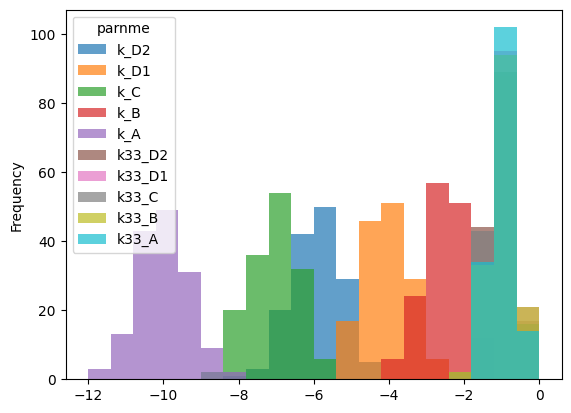

In [33]:
np.log10(pd.DataFrame(l, index = df_k_layers.parnme).T).plot(kind="hist", bins=20, alpha=0.7)

In [34]:
df_ensemble = pd.concat([df_ensemble, pd.DataFrame(l, index = df_k_layers.parnme).T], axis=1)

In [35]:
n_members = df_ensemble.shape[0]

In [36]:
df_ensemble = pd.concat([pd.DataFrame(["real_{}".format(i) for i in range(n_members)], columns=["real_ids"]), df_ensemble], axis=1)

In [37]:
df_ensemble.head()

,real_ids,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:0_x:0.75_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:1_x:2.25_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:2_x:3.75_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:3_x:5.25_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:4_x:6.75_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:5_x:8.25_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:6_x:9.75_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:7_x:11.25_y:104.25,pname:mean_c_inst:0_ptype:gr_pstyle:m_i:0_j:8_x:12.75_y:104.25,...,k_D2,k_D1,k_C,k_B,k_A,k33_D2,k33_D1,k33_C,k33_B,k33_A
0,real_0,1.009742,1.022416,1.034825,1.044757,1.055391,1.064249,1.074685,1.079272,1.083811,...,5.603047e-07,0.000026,2.827851e-07,0.002995,3.220844e-11,0.073061,0.190792,0.240319,0.053670,0.058133
1,real_1,0.940537,0.939141,0.934545,0.929558,0.929345,0.926307,0.922771,0.919559,0.921167,...,1.291733e-06,0.000090,7.104627e-08,0.002283,4.844490e-11,0.026850,0.216225,0.099037,0.054495,0.171569
2,real_2,1.015853,1.017884,1.017405,1.014238,1.013798,1.011799,1.011984,1.015927,1.019720,...,2.852342e-06,0.000018,2.469122e-08,0.006680,1.845924e-10,0.082058,0.084854,0.070816,0.037434,0.031242
3,real_3,1.020690,1.022069,1.016260,1.010406,1.005018,1.003896,1.005397,1.007632,1.009759,...,1.909498e-05,0.000042,6.624165e-08,0.001541,1.664193e-10,0.140394,0.074943,0.070089,0.143040,0.241855
4,real_4,1.054972,1.053516,1.050309,1.042908,1.036029,1.030232,1.022002,1.007398,0.993882,...,7.389961e-07,0.000165,2.166190e-08,0.015820,5.917780e-10,0.092818,0.346367,0.092900,0.080184,0.096087


In [38]:
i_en = pyemu.en.Ensemble("test.pst", df_ensemble)

In [39]:
# i_en.to_binary("template/ensemble_start.jcb")

In [40]:
i_en.to_csv("template/ensemble_start.csv")

In [41]:
i_en.shape

(150, 39211)

In [42]:
# p_cov = i_en.covariance_matrix()

In [43]:
# p_cov.to_binary("test.cov")  --> way too much memory (1Gb...)

In [44]:
# plt.imshow(p_cov.x[100:350, 100:350], interpolation="none", vmin=0)
# plt.colorbar()

## Command line

It will be necessary to add instruction to update the modflow model using ArchPy. First new surfaces are loaded into an ArchPy model created based on ArchPy_workspace. Then, archpy2modflow is created, new grid info are retrieved and applied with flopy to modflow model. In addition we have to modify BCs and obs to match new grid...
 inally, modflow 6 can be run.

In [45]:
pst_name = "test.pst"

In [46]:
# pf.pre_py_cmds.insert(0,"import sys")
pf.pre_py_cmds.append("import sys")
pf.pre_py_cmds.append("sys.path.append('..')")
pf.pre_py_cmds.append("from ArchPy_update import update_gw_model")
# pf.pre_py_cmds.insert(1,"sys.path.append(os.path.join('..','..','..','pypestutils'))")

# ARCHPY # --> execute ArchPy_update.py script
pf.mod_py_cmds.append("update_gw_model()")  # add archpy update script

# run modflow
pf.mod_sys_cmds.append("..\..\..\..\..\..\exe\mf6")  # add modflow command
pst = pf.build_pst(pst_name)

<>:11: DeprecationWarning: invalid escape sequence '\.'
<>:11: DeprecationWarning: invalid escape sequence '\.'
C:\Users\emmal\AppData\Local\Temp\ipykernel_28216\1295124076.py:11: DeprecationWarning: invalid escape sequence '\.'


noptmax:0, npar_adj:39210, nnz_obs:10
2025-09-08 09:33:05.211878 forward_run line:pyemu.os_utils.run(r'..\..\..\..\..\..\exe\mf6')



In [47]:
# pyemu.helpers.zero_order_tikhonov(pst)

In [48]:
# TOO SLOW 
# # use pyemu to apply preferred value (aka zero order Tikhonov) to all adjustable parameter groups
# pyemu.helpers.first_order_pearson_tikhonov(pst, 
#                                             cov=p_cov,     # the covariance matrix; these can be for some OR all parameters in pst
#                                             reset=False, # so as to have both prefered value and prefered differnece eqs
#                                             abs_drop_tol=0.01) # drop pi eqs that have small weight


Pest++

In [49]:
pst.control_data.noptmax = 8 # number of iterations (should be set to a great value (50))
# pst.control_data.nphistp = 0
pst.pestpp_options = {}

# for GLM
# pst.pestpp_options["n_iter_base"] = -1
# pst.pestpp_options["n_iter_super"] = 3
# pst.pestpp_options["glm_num_reals"] = 50 # how many draws

# for IES
pst.pestpp_options["ies_parameter_ensemble"] = "ensemble_start.csv"
pst.pestpp_options["ies_use_empirical_prior"] = True

# pst.pestpp_options["parcov"] = "{}.prior.cov".format(case)
# pst.pestpp_options["base_jacobian"] = "{}.jcb".format(case)
pst.write(os.path.join(template_ws, pst_name), version=1)

noptmax:8, npar_adj:39210, nnz_obs:10


In [50]:
# pst.control_data.get_dataframe()

In [51]:
# pst._write_version2("asdf.pst")

In [52]:
# pst.write("sadf.pst")

In [53]:
pest_exe_names = "..\..\..\..\..\..\exe\pestpp-ies.exe"

<>:1: DeprecationWarning: invalid escape sequence '\.'
<>:1: DeprecationWarning: invalid escape sequence '\.'
C:\Users\emmal\AppData\Local\Temp\ipykernel_28216\1956499151.py:1: DeprecationWarning: invalid escape sequence '\.'


In [54]:
# create master dir (copy from template)
from shutil import copytree
copytree(template_ws, "master_ies", symlinks=False, ignore=None, dirs_exist_ok=True)

'master_ies'

In [94]:
# df = pd.read_csv("master_ies/ensemble_start.csv")

In [ ]:
# pyemu.os_utils.run(f"{pest_exe_names} {pst_name}", cwd="master_ies")

..\..\..\..\..\..\exe\pestpp-ies.exe test.pst


In [55]:
pest_exe_names = "../../../../../../exe/pestpp-ies.exe"

In [58]:
m_d = "master_ies"
pyemu.os_utils.start_workers(template_ws, pest_exe_names, pst_name, 
                             num_workers=15, worker_root=".",
                             master_dir=m_d)

In [ ]:
df_i0 = pd.read_csv("master_ies/test.0.par.csv")
df_i8 = pd.read_csv("master_ies/test.8.par.csv")

In [72]:
all_reals_C_i0 = mean_C * df_i0.iloc[:, 1:9801].values.reshape(n_members, 70, 140).astype(float)
all_reals_C_i8 = mean_C * df_i8.iloc[:, 1:9801].values.reshape(n_members, 70, 140).astype(float)

(-9.0, -1.0)

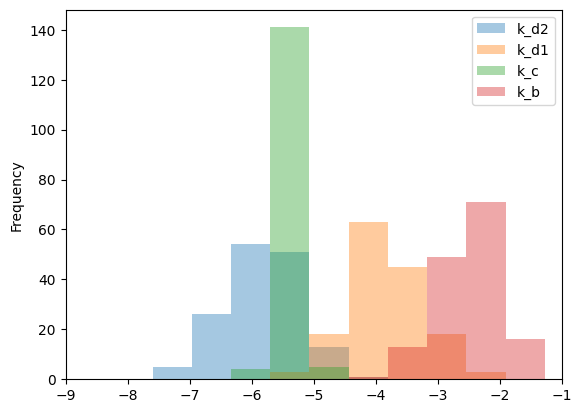

In [73]:
np.log10(df_i8.iloc[:, 9801:9805]).plot(kind="hist", alpha=.4)

plt.xlim(-9, -1)

<Axes: ylabel='Frequency'>

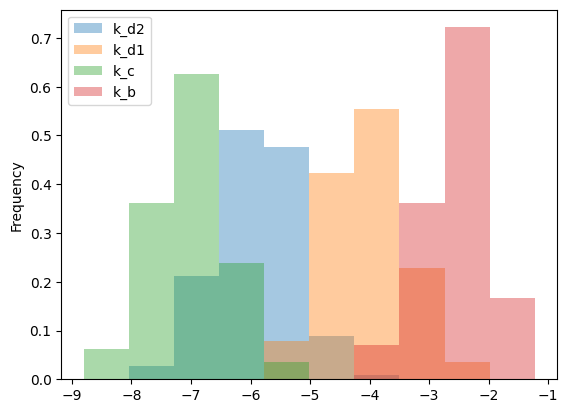

In [74]:
np.log10(df_i0.iloc[:, 9801:9805]).plot(kind="hist", alpha=.4, density=True)

In [75]:
50*70*140

490000

In [76]:
# df_i0 = pd.read_csv("master_ies/test.0.par.csv")
# all_reals_A_i0 = mean_A * df_i0.iloc[:, -9081:].values.reshape(50, 70, 140).astype(float)

# df_i8 = pd.read_csv("master_ies/test.3.par.csv")
# all_reals_A_i8 = mean_A * df_i8.iloc[:, -9081:].values.reshape(50, 70, 140).astype(float)

In [77]:
# df_i8

In [78]:
# plt.imshow(df.iloc[:, 1:-10].values.reshape(50, 70, 140).astype(float).mean(0))
# plt.colorbar()

In [79]:
T1 = ArchPy.inputs.import_project("P1", "./ArchPy_workspace")


### IMPORTING PROJECT P1 IN ./ArchPy_workspace DIRECTORY ### 

Surface_1_dic_surf_mean.npy
Unit A: Surface added for interpolation
Facies basement added to unit A ✅
Unit B: Surface added for interpolation
Facies Sand added to unit B ✅
Facies Gravel added to unit B ✅
Facies GM added to unit B ✅
Facies SM added to unit B ✅
Unit C: Surface added for interpolation
Facies Clay added to unit C ✅
Facies Silt added to unit C ✅
The SubPile object is not an Arch_table object
Unit D: Surface added for interpolation
Facies Sand added to unit D ✅
Facies SM added to unit D ✅
Unit D1: Surface added for interpolation
Facies Sand added to unit D1 ✅
Unit D2: Surface added for interpolation
Facies SM added to unit D2 ✅
Stratigraphic unit D added ✅
Stratigraphic unit C added ✅
Stratigraphic unit B added ✅
Stratigraphic unit A added ✅
Stratigraphic unit D2 added ✅
Stratigraphic unit D1 added ✅
Pile sets as Pile master
Property K added
## Adding Grid ##
## Grid added and is now simulation grid ##


 ##LOADI

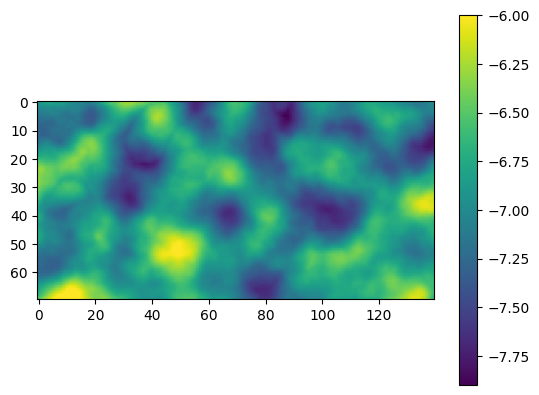

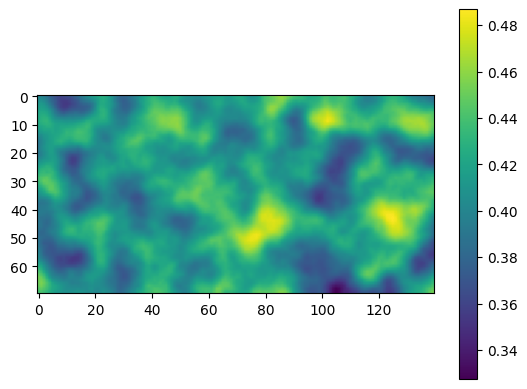

In [83]:
plt.imshow(T1.get_surfaces_unit(T1.get_unit("C"))[0])
plt.colorbar()
plt.show()
plt.imshow(np.flipud(all_reals_C_i8.std(0)))
plt.colorbar()

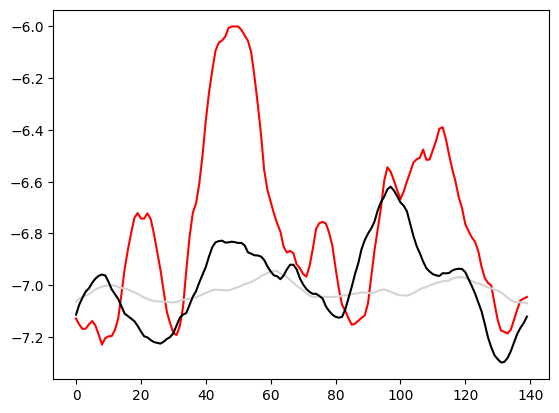

In [90]:
irow = 16
plt.plot(np.flipud(T1.get_surfaces_unit(T1.get_unit("C"))[0])[irow], c="r", label="reference")
plt.plot(all_reals_C_i0.mean(0)[irow].T, c="lightgrey", alpha=1)
# plt.fill_between(range(all_reals_C_i0.shape[2]), all_reals_C_i0[:, irow, :].min(0), all_reals_C_i0[:, irow, :].max(0), color="lightgrey", alpha=0.5)
# 
plt.plot(all_reals_C_i8.mean(0)[irow].T, c="black", alpha=1)
# plt.fill_between(range(all_reals_C_i8.shape[2]), all_reals_C_i8[:, irow, :].min(0), all_reals_C_i8[:, irow, :].max(0), color="lightblue", alpha=0.5)
plt.show()

<Axes: ylabel='Frequency'>

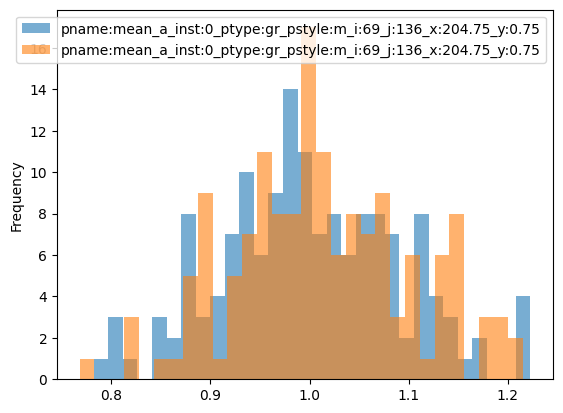

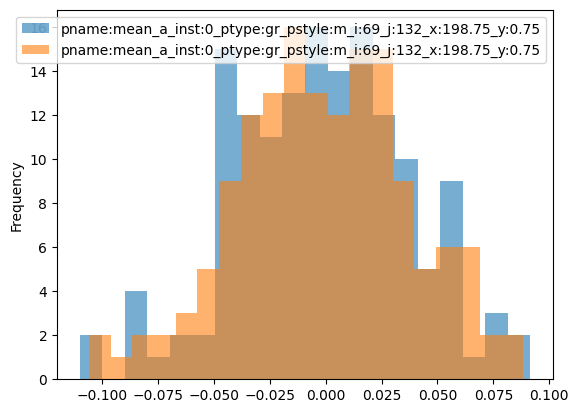

In [91]:

fig, ax = plt.subplots()
df_i0.iloc[:, -4:-3].plot(kind="hist", alpha=.6, bins=30, ax=ax)
df_i8.iloc[:, -4:-3].plot(kind="hist", alpha=.6, bins=30, ax=ax)

fig, ax = plt.subplots()
np.log10(df_i0.iloc[:, -8:-7]).plot(kind="hist", alpha=.6, bins=20, ax=ax)
np.log10(df_i8.iloc[:, -8:-7]).plot(kind="hist", alpha=.6, bins=20, ax=ax)

[Text(1, 0, 'oname:hds_otype:lst_usecol:h10_time:1'),
 Text(2, 0, 'oname:hds_otype:lst_usecol:h1_time:1'),
 Text(3, 0, 'oname:hds_otype:lst_usecol:h2_time:1'),
 Text(4, 0, 'oname:hds_otype:lst_usecol:h3_time:1'),
 Text(5, 0, 'oname:hds_otype:lst_usecol:h4_time:1'),
 Text(6, 0, 'oname:hds_otype:lst_usecol:h5_time:1'),
 Text(7, 0, 'oname:hds_otype:lst_usecol:h6_time:1'),
 Text(8, 0, 'oname:hds_otype:lst_usecol:h7_time:1'),
 Text(9, 0, 'oname:hds_otype:lst_usecol:h8_time:1'),
 Text(10, 0, 'oname:hds_otype:lst_usecol:h9_time:1')]

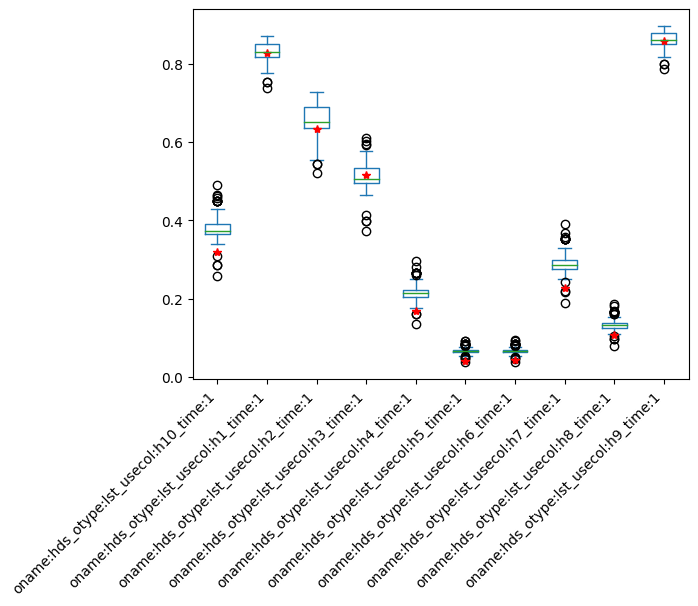

In [113]:
ax = plt.gca()
pd.read_csv("master_ies/test.8.obs.csv").iloc[:, 1:].plot(kind="box", ax=ax)
plt.plot(range(1, 11), pst.observation_data.obsval.values, marker="*", linestyle="none", c="r")

# rotate x axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# pd.read_csv("master_ies/test.0.obs.csv").iloc[:, 1:].plot(kind="box", ax=ax, positions=np.arange(-0.5, 9.5, 1), widths=0.3, color="k")
# plt.plot(range(1, 11), pst.observation_data.obsval.values, marker="*", linestyle="none", c="r")

# ax = plt.gca()
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

[Text(1, 0, 'oname:hds_otype:lst_usecol:h10_time:1'),
 Text(2, 0, 'oname:hds_otype:lst_usecol:h1_time:1'),
 Text(3, 0, 'oname:hds_otype:lst_usecol:h2_time:1'),
 Text(4, 0, 'oname:hds_otype:lst_usecol:h3_time:1'),
 Text(5, 0, 'oname:hds_otype:lst_usecol:h4_time:1'),
 Text(6, 0, 'oname:hds_otype:lst_usecol:h5_time:1'),
 Text(7, 0, 'oname:hds_otype:lst_usecol:h6_time:1'),
 Text(8, 0, 'oname:hds_otype:lst_usecol:h7_time:1'),
 Text(9, 0, 'oname:hds_otype:lst_usecol:h8_time:1'),
 Text(10, 0, 'oname:hds_otype:lst_usecol:h9_time:1')]

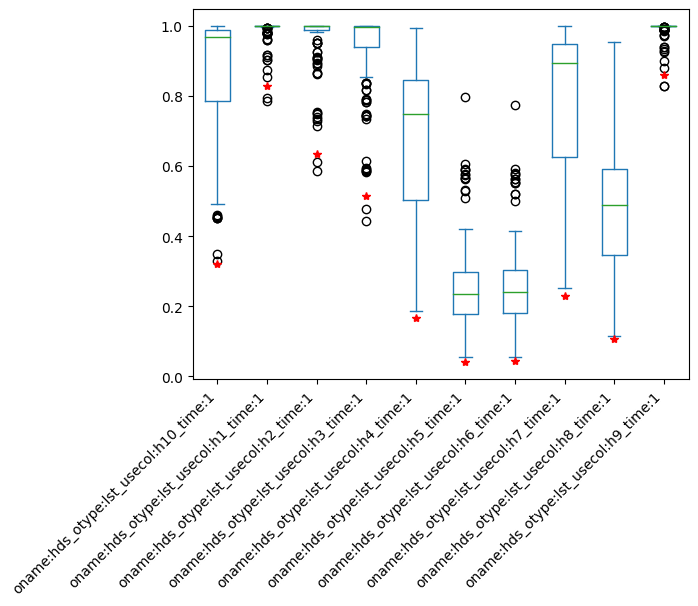

In [114]:
ax = plt.gca()
pd.read_csv("master_ies/test.0.obs.csv").iloc[:, 1:].plot(kind="box", ax=ax)
plt.plot(range(1, 11), pst.observation_data.obsval.values, marker="*", linestyle="none", c="r")

# rotate x axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

(0.0, 1.0)

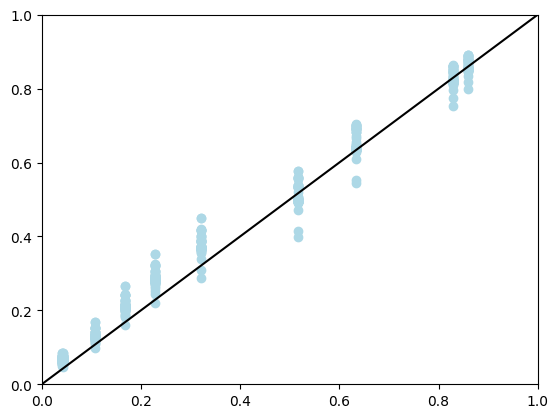

In [115]:
for i in range(50):
    plt.scatter(pst.observation_data.obsval.values, pd.read_csv("master_ies/test.8.obs.csv").iloc[i, 1:], c="lightblue")
plt.plot((0, 1.1), (0, 1.1), c="k")

plt.xlim(0, 1)
plt.ylim(0, 1)